# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 20:05:22.715263: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T20:05:25.885330
2025-04-14 20:05:25.885330


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 7
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 937
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 20:05:20"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >], dtype=object)

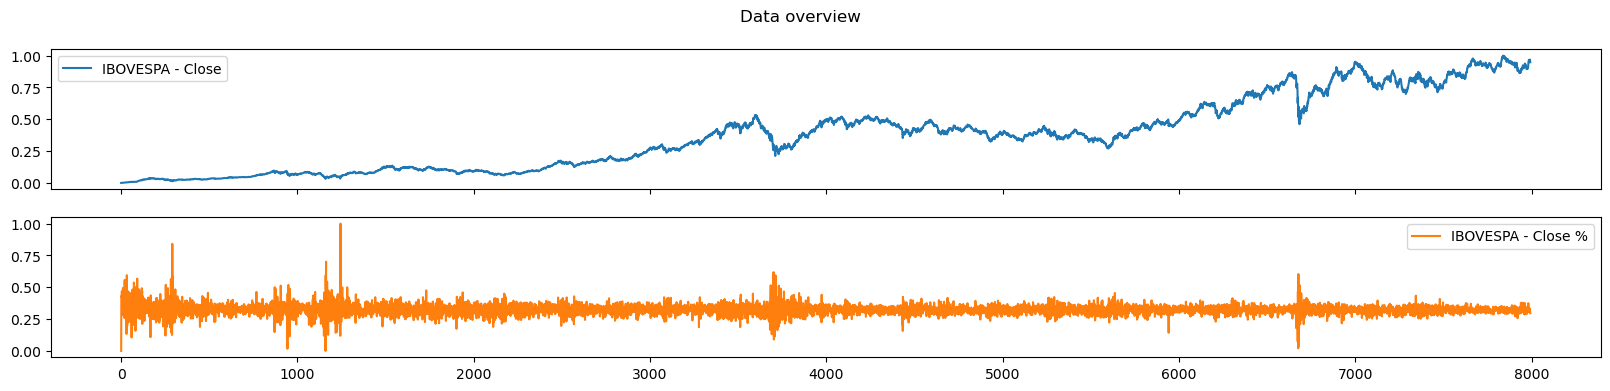

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >], dtype=object)

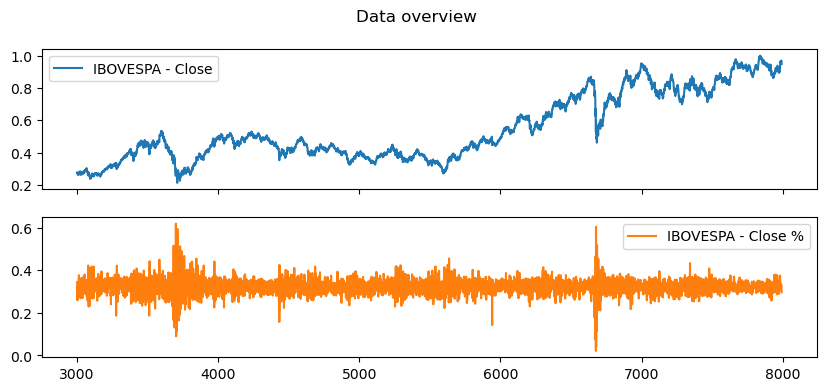

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >], dtype=object)

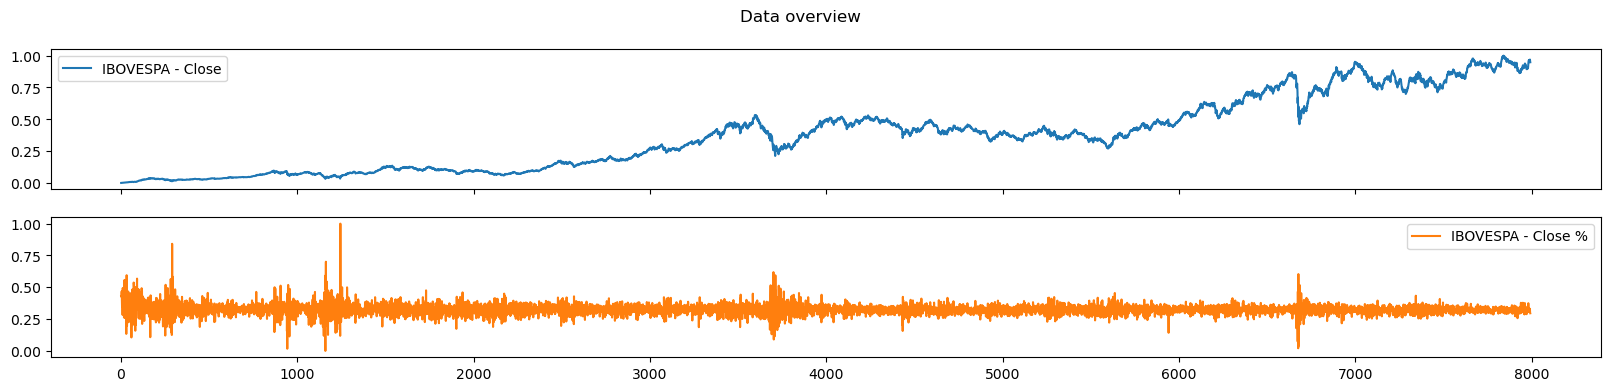

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

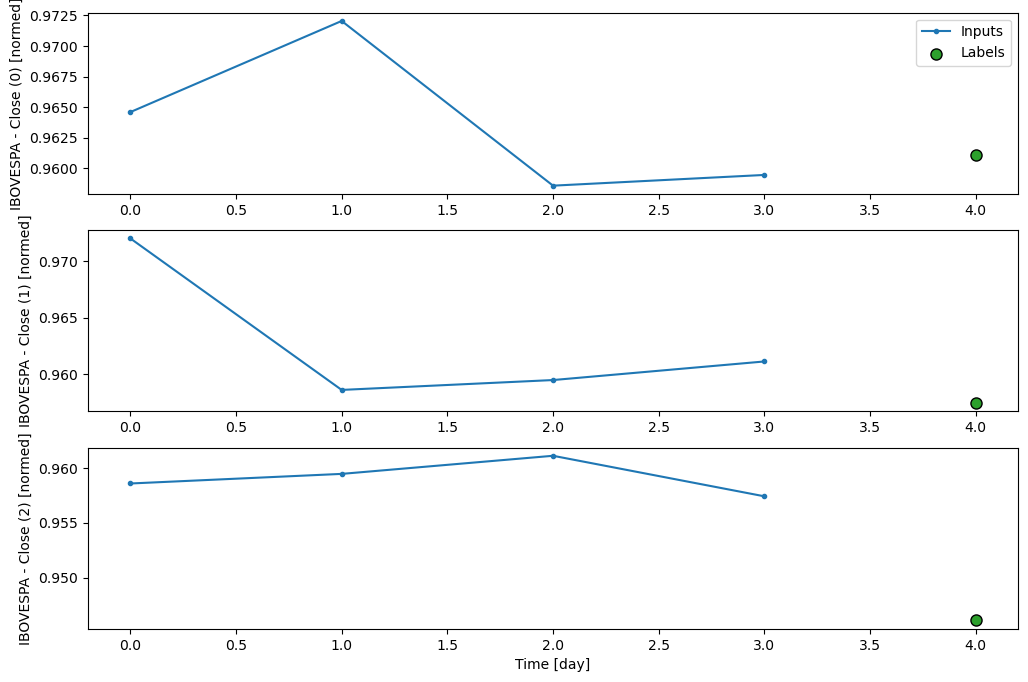

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

2

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 15:12 4s/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0882e-05 - root_mean_squared_error: 0.0033

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 67.2233 - mean_squared_error: 6.9560e-05 - root_mean_squared_error: 0.0079   

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 56.0559 - mean_squared_error: 8.3364e-05 - root_mean_squared_error: 0.0088

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 47.6168 - mean_squared_error: 9.2220e-05 - root_mean_squared_error: 0.0093

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 43.2084 - mean_squared_error: 1.1495e-04 - root_mean_squared_error: 0.0104

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 40.1285 - mean_squared_error: 1.4487e-04 - root_mean_squared_error: 0.0115

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 38.0442 - mean_squared_error: 1.7251e-04 - root_mean_squared_error: 0.0125

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 36.2054 - mean_squared_error: 1.8986e-04 - root_mean_squared_error: 0.0132

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 34.6959 - mean_squared_error: 2.0213e-04 - root_mean_squared_error: 0.0137

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 33.4748 - mean_squared_error: 2.1950e-04 - root_mean_squared_error: 0.0142

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 32.3395 - mean_squared_error: 2.3389e-04 - root_mean_squared_error: 0.0147

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 31.3547 - mean_squared_error: 2.6024e-04 - root_mean_squared_error: 0.0155

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 30.3405 - mean_squared_error: 2.8904e-04 - root_mean_squared_error: 0.0162

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 29.5389 - mean_squared_error: 3.3294e-04 - root_mean_squared_error: 0.0172

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 28.8617 - mean_squared_error: 5.1319e-04 - root_mean_squared_error: 0.0198

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 28.4392 - mean_squared_error: 7.4229e-04 - root_mean_squared_error: 0.0225

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 27.9987 - mean_squared_error: 9.8266e-04 - root_mean_squared_error: 0.0253

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 27.5796 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0278    

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 27.1888 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0299

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 26.8031 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0318

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 26.3993 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0337

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 26.0709 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0353

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 25.7565 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0368

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 25.4490 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0382

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 25.1675 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0398

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 24.9033 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0415

238/238 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 24.6473 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0431 - val_loss: 0.1835 - val_mean_absolute_error: 0.1835 - val_mean_absolute_percentage_error: 19.6992 - val_mean_squared_error: 0.0351 - val_root_mean_squared_error: 0.1875 - lr: 0.0098


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.7202 - mean_absolute_error: 0.7202 - mean_absolute_percentage_error: 31052.6230 - mean_squared_error: 0.5187 - root_mean_squared_error: 0.7202

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6805 - mean_absolute_error: 0.6805 - mean_absolute_percentage_error: 12367.5762 - mean_squared_error: 0.4652 - root_mean_squared_error: 0.6815 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6284 - mean_absolute_error: 0.6284 - mean_absolute_percentage_error: 8931.4883 - mean_squared_error: 0.4076 - root_mean_squared_error: 0.6357 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5624 - mean_absolute_error: 0.5624 - mean_absolute_percentage_error: 7135.8892 - mean_squared_error: 0.3522 - root_mean_squared_error: 0.5868

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5045 - mean_absolute_error: 0.5045 - mean_absolute_percentage_error: 5995.6982 - mean_squared_error: 0.3087 - root_mean_squared_error: 0.5450

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4568 - mean_absolute_error: 0.4568 - mean_absolute_percentage_error: 5199.6855 - mean_squared_error: 0.2751 - root_mean_squared_error: 0.5105

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4218 - mean_absolute_error: 0.4218 - mean_absolute_percentage_error: 4666.8130 - mean_squared_error: 0.2513 - root_mean_squared_error: 0.4847

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4027 - mean_absolute_error: 0.4027 - mean_absolute_percentage_error: 4391.5420 - mean_squared_error: 0.2385 - root_mean_squared_error: 0.4705

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3855 - mean_absolute_error: 0.3855 - mean_absolute_percentage_error: 4150.4150 - mean_squared_error: 0.2272 - root_mean_squared_error: 0.4575

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3700 - mean_absolute_error: 0.3700 - mean_absolute_percentage_error: 3937.2654 - mean_squared_error: 0.2169 - root_mean_squared_error: 0.4455

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3531 - mean_absolute_error: 0.3531 - mean_absolute_percentage_error: 3711.7859 - mean_squared_error: 0.2060 - root_mean_squared_error: 0.4324

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3309 - mean_absolute_error: 0.3309 - mean_absolute_percentage_error: 3422.8191 - mean_squared_error: 0.1916 - root_mean_squared_error: 0.4147

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3118 - mean_absolute_error: 0.3118 - mean_absolute_percentage_error: 3179.8843 - mean_squared_error: 0.1794 - root_mean_squared_error: 0.3992

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2969 - mean_absolute_error: 0.2969 - mean_absolute_percentage_error: 2993.9719 - mean_squared_error: 0.1699 - root_mean_squared_error: 0.3868

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2822 - mean_absolute_error: 0.2822 - mean_absolute_percentage_error: 2811.7085 - mean_squared_error: 0.1605 - root_mean_squared_error: 0.3743

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2734 - mean_absolute_error: 0.2734 - mean_absolute_percentage_error: 2703.3162 - mean_squared_error: 0.1549 - root_mean_squared_error: 0.3666

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2669 - mean_absolute_error: 0.2669 - mean_absolute_percentage_error: 2619.9077 - mean_squared_error: 0.1505 - root_mean_squared_error: 0.3607

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2607 - mean_absolute_error: 0.2607 - mean_absolute_percentage_error: 2542.0408 - mean_squared_error: 0.1465 - root_mean_squared_error: 0.3551

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2528 - mean_absolute_error: 0.2528 - mean_absolute_percentage_error: 2441.2764 - mean_squared_error: 0.1412 - root_mean_squared_error: 0.3477

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2434 - mean_absolute_error: 0.2434 - mean_absolute_percentage_error: 2324.0356 - mean_squared_error: 0.1350 - root_mean_squared_error: 0.3388

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2350 - mean_absolute_error: 0.2350 - mean_absolute_percentage_error: 2218.6414 - mean_squared_error: 0.1294 - root_mean_squared_error: 0.3307

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2273 - mean_absolute_error: 0.2273 - mean_absolute_percentage_error: 2123.3088 - mean_squared_error: 0.1243 - root_mean_squared_error: 0.3232

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2225 - mean_absolute_error: 0.2225 - mean_absolute_percentage_error: 2064.6335 - mean_squared_error: 0.1212 - root_mean_squared_error: 0.3185

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2179 - mean_absolute_error: 0.2179 - mean_absolute_percentage_error: 2009.4408 - mean_squared_error: 0.1182 - root_mean_squared_error: 0.3139

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2130 - mean_absolute_error: 0.2130 - mean_absolute_percentage_error: 1949.0403 - mean_squared_error: 0.1150 - root_mean_squared_error: 0.3089

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2070 - mean_absolute_error: 0.2070 - mean_absolute_percentage_error: 1877.0481 - mean_squared_error: 0.1111 - root_mean_squared_error: 0.3029

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2017 - mean_absolute_error: 0.2017 - mean_absolute_percentage_error: 1810.7252 - mean_squared_error: 0.1075 - root_mean_squared_error: 0.2973

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1970 - mean_absolute_error: 0.1970 - mean_absolute_percentage_error: 1749.4075 - mean_squared_error: 0.1042 - root_mean_squared_error: 0.2921

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1928 - mean_absolute_error: 0.1928 - mean_absolute_percentage_error: 1692.5245 - mean_squared_error: 0.1012 - root_mean_squared_error: 0.2873

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1892 - mean_absolute_error: 0.1892 - mean_absolute_percentage_error: 1645.2850 - mean_squared_error: 0.0986 - root_mean_squared_error: 0.2833

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1868 - mean_absolute_error: 0.1868 - mean_absolute_percentage_error: 1611.7229 - mean_squared_error: 0.0969 - root_mean_squared_error: 0.2805

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1848 - mean_absolute_error: 0.1848 - mean_absolute_percentage_error: 1584.8866 - mean_squared_error: 0.0954 - root_mean_squared_error: 0.2781

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1832 - mean_absolute_error: 0.1832 - mean_absolute_percentage_error: 1564.1300 - mean_squared_error: 0.0943 - root_mean_squared_error: 0.2763 - val_loss: 0.1335 - val_mean_absolute_error: 0.1335 - val_mean_absolute_percentage_error: 14.2812 - val_mean_squared_error: 0.0193 - val_root_mean_squared_error: 0.1389 - lr: 0.0095


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7686 - mean_absolute_error: 0.7686 - mean_absolute_percentage_error: 33133.1328 - mean_squared_error: 0.5908 - root_mean_squared_error: 0.7686

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7569 - mean_absolute_error: 0.7569 - mean_absolute_percentage_error: 14008.5996 - mean_squared_error: 0.5733 - root_mean_squared_error: 0.7571 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7295 - mean_absolute_error: 0.7295 - mean_absolute_percentage_error: 10039.7568 - mean_squared_error: 0.5352 - root_mean_squared_error: 0.7309

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6876 - mean_absolute_error: 0.6876 - mean_absolute_percentage_error: 8072.1636 - mean_squared_error: 0.4872 - root_mean_squared_error: 0.6954 

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6337 - mean_absolute_error: 0.6337 - mean_absolute_percentage_error: 6810.8320 - mean_squared_error: 0.4382 - root_mean_squared_error: 0.6562

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5824 - mean_absolute_error: 0.5824 - mean_absolute_percentage_error: 5922.8901 - mean_squared_error: 0.3963 - root_mean_squared_error: 0.6204

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5379 - mean_absolute_error: 0.5379 - mean_absolute_percentage_error: 5260.3013 - mean_squared_error: 0.3617 - root_mean_squared_error: 0.5892

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4998 - mean_absolute_error: 0.4998 - mean_absolute_percentage_error: 4744.8535 - mean_squared_error: 0.3329 - root_mean_squared_error: 0.5620

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4671 - mean_absolute_error: 0.4671 - mean_absolute_percentage_error: 4331.1260 - mean_squared_error: 0.3087 - root_mean_squared_error: 0.5382

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4388 - mean_absolute_error: 0.4388 - mean_absolute_percentage_error: 3990.8252 - mean_squared_error: 0.2880 - root_mean_squared_error: 0.5173

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4141 - mean_absolute_error: 0.4141 - mean_absolute_percentage_error: 3705.3179 - mean_squared_error: 0.2702 - root_mean_squared_error: 0.4987

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3925 - mean_absolute_error: 0.3925 - mean_absolute_percentage_error: 3461.9729 - mean_squared_error: 0.2548 - root_mean_squared_error: 0.4820

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3734 - mean_absolute_error: 0.3734 - mean_absolute_percentage_error: 3251.7546 - mean_squared_error: 0.2411 - root_mean_squared_error: 0.4669

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3563 - mean_absolute_error: 0.3563 - mean_absolute_percentage_error: 3068.1248 - mean_squared_error: 0.2291 - root_mean_squared_error: 0.4533

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3413 - mean_absolute_error: 0.3413 - mean_absolute_percentage_error: 2906.2510 - mean_squared_error: 0.2183 - root_mean_squared_error: 0.4408

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3266 - mean_absolute_error: 0.3266 - mean_absolute_percentage_error: 2747.3325 - mean_squared_error: 0.2077 - root_mean_squared_error: 0.4283

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3149 - mean_absolute_error: 0.3149 - mean_absolute_percentage_error: 2619.9810 - mean_squared_error: 0.1991 - root_mean_squared_error: 0.4180

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3041 - mean_absolute_error: 0.3041 - mean_absolute_percentage_error: 2505.0933 - mean_squared_error: 0.1912 - root_mean_squared_error: 0.4084

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2943 - mean_absolute_error: 0.2943 - mean_absolute_percentage_error: 2400.8506 - mean_squared_error: 0.1841 - root_mean_squared_error: 0.3995

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2842 - mean_absolute_error: 0.2842 - mean_absolute_percentage_error: 2295.7439 - mean_squared_error: 0.1768 - root_mean_squared_error: 0.3903

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2758 - mean_absolute_error: 0.2758 - mean_absolute_percentage_error: 2209.5039 - mean_squared_error: 0.1708 - root_mean_squared_error: 0.3826

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2690 - mean_absolute_error: 0.2690 - mean_absolute_percentage_error: 2138.6697 - mean_squared_error: 0.1658 - root_mean_squared_error: 0.3762

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2619 - mean_absolute_error: 0.2619 - mean_absolute_percentage_error: 2064.7778 - mean_squared_error: 0.1606 - root_mean_squared_error: 0.3693

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2555 - mean_absolute_error: 0.2555 - mean_absolute_percentage_error: 1996.3392 - mean_squared_error: 0.1558 - root_mean_squared_error: 0.3630

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2501 - mean_absolute_error: 0.2501 - mean_absolute_percentage_error: 1939.5920 - mean_squared_error: 0.1518 - root_mean_squared_error: 0.3576

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2451 - mean_absolute_error: 0.2451 - mean_absolute_percentage_error: 1886.3044 - mean_squared_error: 0.1480 - root_mean_squared_error: 0.3525

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2399 - mean_absolute_error: 0.2399 - mean_absolute_percentage_error: 1830.0942 - mean_squared_error: 0.1440 - root_mean_squared_error: 0.3470

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2371 - mean_absolute_error: 0.2371 - mean_absolute_percentage_error: 1800.4508 - mean_squared_error: 0.1419 - root_mean_squared_error: 0.3441 - val_loss: 0.1489 - val_mean_absolute_error: 0.1489 - val_mean_absolute_percentage_error: 15.9587 - val_mean_squared_error: 0.0237 - val_root_mean_squared_error: 0.1538 - lr: 0.0093


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6906 - mean_absolute_error: 0.6906 - mean_absolute_percentage_error: 29772.4648 - mean_squared_error: 0.4769 - root_mean_squared_error: 0.6906

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6701 - mean_absolute_error: 0.6701 - mean_absolute_percentage_error: 12521.4766 - mean_squared_error: 0.4496 - root_mean_squared_error: 0.6704 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6406 - mean_absolute_error: 0.6406 - mean_absolute_percentage_error: 8945.8730 - mean_squared_error: 0.4139 - root_mean_squared_error: 0.6424 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5945 - mean_absolute_error: 0.5945 - mean_absolute_percentage_error: 7161.1318 - mean_squared_error: 0.3702 - root_mean_squared_error: 0.6052

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5474 - mean_absolute_error: 0.5474 - mean_absolute_percentage_error: 6031.3350 - mean_squared_error: 0.3310 - root_mean_squared_error: 0.5691

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5057 - mean_absolute_error: 0.5057 - mean_absolute_percentage_error: 5243.3198 - mean_squared_error: 0.2988 - root_mean_squared_error: 0.5375

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4696 - mean_absolute_error: 0.4696 - mean_absolute_percentage_error: 4656.7466 - mean_squared_error: 0.2724 - root_mean_squared_error: 0.5102

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4350 - mean_absolute_error: 0.4350 - mean_absolute_percentage_error: 4156.0479 - mean_squared_error: 0.2483 - root_mean_squared_error: 0.4841

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4079 - mean_absolute_error: 0.4079 - mean_absolute_percentage_error: 3798.0769 - mean_squared_error: 0.2303 - root_mean_squared_error: 0.4638

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3843 - mean_absolute_error: 0.3843 - mean_absolute_percentage_error: 3502.8438 - mean_squared_error: 0.2150 - root_mean_squared_error: 0.4458

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3657 - mean_absolute_error: 0.3657 - mean_absolute_percentage_error: 3280.3259 - mean_squared_error: 0.2031 - root_mean_squared_error: 0.4315

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3471 - mean_absolute_error: 0.3471 - mean_absolute_percentage_error: 3064.8538 - mean_squared_error: 0.1914 - root_mean_squared_error: 0.4170

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3324 - mean_absolute_error: 0.3324 - mean_absolute_percentage_error: 2898.1619 - mean_squared_error: 0.1822 - root_mean_squared_error: 0.4053

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3175 - mean_absolute_error: 0.3175 - mean_absolute_percentage_error: 2733.2046 - mean_squared_error: 0.1730 - root_mean_squared_error: 0.3933

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3042 - mean_absolute_error: 0.3042 - mean_absolute_percentage_error: 2587.9199 - mean_squared_error: 0.1648 - root_mean_squared_error: 0.3824

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2925 - mean_absolute_error: 0.2925 - mean_absolute_percentage_error: 2458.8706 - mean_squared_error: 0.1574 - root_mean_squared_error: 0.3725

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2819 - mean_absolute_error: 0.2819 - mean_absolute_percentage_error: 2343.3770 - mean_squared_error: 0.1508 - root_mean_squared_error: 0.3633

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2722 - mean_absolute_error: 0.2722 - mean_absolute_percentage_error: 2239.3289 - mean_squared_error: 0.1448 - root_mean_squared_error: 0.3549

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2624 - mean_absolute_error: 0.2624 - mean_absolute_percentage_error: 2135.1060 - mean_squared_error: 0.1387 - root_mean_squared_error: 0.3462

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2542 - mean_absolute_error: 0.2542 - mean_absolute_percentage_error: 2050.0840 - mean_squared_error: 0.1336 - root_mean_squared_error: 0.3389

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2467 - mean_absolute_error: 0.2467 - mean_absolute_percentage_error: 1972.2483 - mean_squared_error: 0.1290 - root_mean_squared_error: 0.3321

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2398 - mean_absolute_error: 0.2398 - mean_absolute_percentage_error: 1900.7019 - mean_squared_error: 0.1248 - root_mean_squared_error: 0.3257

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2327 - mean_absolute_error: 0.2327 - mean_absolute_percentage_error: 1827.6621 - mean_squared_error: 0.1204 - root_mean_squared_error: 0.3191

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2269 - mean_absolute_error: 0.2269 - mean_absolute_percentage_error: 1767.0428 - mean_squared_error: 0.1167 - root_mean_squared_error: 0.3135

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2215 - mean_absolute_error: 0.2215 - mean_absolute_percentage_error: 1710.7238 - mean_squared_error: 0.1133 - root_mean_squared_error: 0.3082

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2165 - mean_absolute_error: 0.2165 - mean_absolute_percentage_error: 1658.2388 - mean_squared_error: 0.1102 - root_mean_squared_error: 0.3033

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2114 - mean_absolute_error: 0.2114 - mean_absolute_percentage_error: 1603.9414 - mean_squared_error: 0.1069 - root_mean_squared_error: 0.2981

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2104 - mean_absolute_error: 0.2104 - mean_absolute_percentage_error: 1593.5631 - mean_squared_error: 0.1063 - root_mean_squared_error: 0.2971 - val_loss: 0.1546 - val_mean_absolute_error: 0.1546 - val_mean_absolute_percentage_error: 16.5685 - val_mean_squared_error: 0.0254 - val_root_mean_squared_error: 0.1592 - lr: 0.0090


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.5871 - mean_absolute_error: 0.5871 - mean_absolute_percentage_error: 25319.2480 - mean_squared_error: 0.3447 - root_mean_squared_error: 0.5871

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5638 - mean_absolute_error: 0.5638 - mean_absolute_percentage_error: 10620.5889 - mean_squared_error: 0.3188 - root_mean_squared_error: 0.5643 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5273 - mean_absolute_error: 0.5273 - mean_absolute_percentage_error: 7538.9141 - mean_squared_error: 0.2833 - root_mean_squared_error: 0.5307 

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4775 - mean_absolute_error: 0.4775 - mean_absolute_percentage_error: 5994.7344 - mean_squared_error: 0.2465 - root_mean_squared_error: 0.4920

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4309 - mean_absolute_error: 0.4309 - mean_absolute_percentage_error: 5023.7329 - mean_squared_error: 0.2165 - root_mean_squared_error: 0.4577

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3876 - mean_absolute_error: 0.3876 - mean_absolute_percentage_error: 4287.1885 - mean_squared_error: 0.1909 - root_mean_squared_error: 0.4261

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3523 - mean_absolute_error: 0.3523 - mean_absolute_percentage_error: 3757.0811 - mean_squared_error: 0.1710 - root_mean_squared_error: 0.4002

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3233 - mean_absolute_error: 0.3233 - mean_absolute_percentage_error: 3355.0935 - mean_squared_error: 0.1552 - root_mean_squared_error: 0.3785

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3015 - mean_absolute_error: 0.3015 - mean_absolute_percentage_error: 3067.3083 - mean_squared_error: 0.1435 - root_mean_squared_error: 0.3619

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2827 - mean_absolute_error: 0.2827 - mean_absolute_percentage_error: 2829.6523 - mean_squared_error: 0.1336 - root_mean_squared_error: 0.3473

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2665 - mean_absolute_error: 0.2665 - mean_absolute_percentage_error: 2629.6631 - mean_squared_error: 0.1251 - root_mean_squared_error: 0.3344

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2522 - mean_absolute_error: 0.2522 - mean_absolute_percentage_error: 2458.7578 - mean_squared_error: 0.1178 - root_mean_squared_error: 0.3229

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2397 - mean_absolute_error: 0.2397 - mean_absolute_percentage_error: 2310.8257 - mean_squared_error: 0.1114 - root_mean_squared_error: 0.3125

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2285 - mean_absolute_error: 0.2285 - mean_absolute_percentage_error: 2181.3921 - mean_squared_error: 0.1057 - root_mean_squared_error: 0.3031

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2186 - mean_absolute_error: 0.2186 - mean_absolute_percentage_error: 2067.1008 - mean_squared_error: 0.1006 - root_mean_squared_error: 0.2946

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2098 - mean_absolute_error: 0.2098 - mean_absolute_percentage_error: 1965.3361 - mean_squared_error: 0.0960 - root_mean_squared_error: 0.2868

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2026 - mean_absolute_error: 0.2026 - mean_absolute_percentage_error: 1883.7471 - mean_squared_error: 0.0924 - root_mean_squared_error: 0.2804

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1967 - mean_absolute_error: 0.1967 - mean_absolute_percentage_error: 1818.2615 - mean_squared_error: 0.0894 - root_mean_squared_error: 0.2751

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1912 - mean_absolute_error: 0.1912 - mean_absolute_percentage_error: 1757.6226 - mean_squared_error: 0.0866 - root_mean_squared_error: 0.2702

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1847 - mean_absolute_error: 0.1847 - mean_absolute_percentage_error: 1685.9237 - mean_squared_error: 0.0834 - root_mean_squared_error: 0.2642

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1787 - mean_absolute_error: 0.1787 - mean_absolute_percentage_error: 1620.3964 - mean_squared_error: 0.0804 - root_mean_squared_error: 0.2586

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1731 - mean_absolute_error: 0.1731 - mean_absolute_percentage_error: 1560.2506 - mean_squared_error: 0.0776 - root_mean_squared_error: 0.2534

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1691 - mean_absolute_error: 0.1691 - mean_absolute_percentage_error: 1516.7689 - mean_squared_error: 0.0756 - root_mean_squared_error: 0.2495

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1642 - mean_absolute_error: 0.1642 - mean_absolute_percentage_error: 1464.6436 - mean_squared_error: 0.0731 - root_mean_squared_error: 0.2448

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1598 - mean_absolute_error: 0.1598 - mean_absolute_percentage_error: 1416.3312 - mean_squared_error: 0.0709 - root_mean_squared_error: 0.2405

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1558 - mean_absolute_error: 0.1558 - mean_absolute_percentage_error: 1371.4207 - mean_squared_error: 0.0688 - root_mean_squared_error: 0.2364

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1521 - mean_absolute_error: 0.1521 - mean_absolute_percentage_error: 1329.5433 - mean_squared_error: 0.0669 - root_mean_squared_error: 0.2326

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1491 - mean_absolute_error: 0.1491 - mean_absolute_percentage_error: 1294.6245 - mean_squared_error: 0.0653 - root_mean_squared_error: 0.2294 - val_loss: 0.1175 - val_mean_absolute_error: 0.1175 - val_mean_absolute_percentage_error: 12.5584 - val_mean_squared_error: 0.0151 - val_root_mean_squared_error: 0.1229 - lr: 0.0088


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.2619 - mean_absolute_error: 0.2619 - mean_absolute_percentage_error: 11311.4072 - mean_squared_error: 0.0686 - root_mean_squared_error: 0.2619

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2256 - mean_absolute_error: 0.2256 - mean_absolute_percentage_error: 4622.5718 - mean_squared_error: 0.0531 - root_mean_squared_error: 0.2291  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1784 - mean_absolute_error: 0.1784 - mean_absolute_percentage_error: 3044.8325 - mean_squared_error: 0.0388 - root_mean_squared_error: 0.1926

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1521 - mean_absolute_error: 0.1521 - mean_absolute_percentage_error: 2386.7915 - mean_squared_error: 0.0316 - root_mean_squared_error: 0.1714

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1334 - mean_absolute_error: 0.1334 - mean_absolute_percentage_error: 1983.2179 - mean_squared_error: 0.0268 - root_mean_squared_error: 0.1562

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1178 - mean_absolute_error: 0.1178 - mean_absolute_percentage_error: 1681.5902 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1433

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1070 - mean_absolute_error: 0.1070 - mean_absolute_percentage_error: 1485.5134 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1342

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0982 - mean_absolute_error: 0.0982 - mean_absolute_percentage_error: 1334.2513 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1267

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0909 - mean_absolute_error: 0.0909 - mean_absolute_percentage_error: 1213.6204 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1204

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0849 - mean_absolute_error: 0.0849 - mean_absolute_percentage_error: 1114.9662 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1150

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0798 - mean_absolute_error: 0.0798 - mean_absolute_percentage_error: 1032.6273 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1103

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 955.6606 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1058 

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 896.5503 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1025

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 845.0414 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0996

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 799.7155 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0970

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 755.2744 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0945

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 719.6912 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0924

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 687.6153 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0904

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 658.5375 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0886

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 632.0449 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0868

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 607.8016 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0852

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 585.5217 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0837

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 564.9693 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0823

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 545.9492 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0810

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 526.4183 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0799

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 510.1110 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0789

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 496.5242 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0781 - val_loss: 0.0627 - val_mean_absolute_error: 0.0627 - val_mean_absolute_percentage_error: 6.6750 - val_mean_squared_error: 0.0047 - val_root_mean_squared_error: 0.0684 - lr: 0.0086


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.3069 - mean_absolute_error: 0.3069 - mean_absolute_percentage_error: 13246.8525 - mean_squared_error: 0.0942 - root_mean_squared_error: 0.3069

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2753 - mean_absolute_error: 0.2753 - mean_absolute_percentage_error: 5466.3066 - mean_squared_error: 0.0773 - root_mean_squared_error: 0.2772  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2278 - mean_absolute_error: 0.2278 - mean_absolute_percentage_error: 3647.4302 - mean_squared_error: 0.0591 - root_mean_squared_error: 0.2393

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1984 - mean_absolute_error: 0.1984 - mean_absolute_percentage_error: 2878.0261 - mean_squared_error: 0.0490 - root_mean_squared_error: 0.2156

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1765 - mean_absolute_error: 0.1765 - mean_absolute_percentage_error: 2401.5596 - mean_squared_error: 0.0421 - root_mean_squared_error: 0.1978

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1628 - mean_absolute_error: 0.1628 - mean_absolute_percentage_error: 2137.4163 - mean_squared_error: 0.0380 - root_mean_squared_error: 0.1867

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1513 - mean_absolute_error: 0.1513 - mean_absolute_percentage_error: 1931.0861 - mean_squared_error: 0.0347 - root_mean_squared_error: 0.1773

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1379 - mean_absolute_error: 0.1379 - mean_absolute_percentage_error: 1703.0880 - mean_squared_error: 0.0310 - root_mean_squared_error: 0.1662

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1280 - mean_absolute_error: 0.1280 - mean_absolute_percentage_error: 1543.6398 - mean_squared_error: 0.0284 - root_mean_squared_error: 0.1579

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1198 - mean_absolute_error: 0.1198 - mean_absolute_percentage_error: 1414.4009 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1508

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1128 - mean_absolute_error: 0.1128 - mean_absolute_percentage_error: 1307.1752 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1446

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1067 - mean_absolute_error: 0.1067 - mean_absolute_percentage_error: 1216.5728 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1392

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1014 - mean_absolute_error: 0.1014 - mean_absolute_percentage_error: 1138.8763 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1344

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0968 - mean_absolute_error: 0.0968 - mean_absolute_percentage_error: 1071.4432 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1300

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 1012.3386 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1262

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 960.0720 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1229 

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 913.4617 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1199

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 876.0357 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1174

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 837.7796 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1148

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0794 - mean_absolute_error: 0.0794 - mean_absolute_percentage_error: 803.0350 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1123

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 771.3256 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1100

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 742.2650 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1079

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 715.5182 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1059

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 690.8104 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1040

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 667.9117 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1023

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 646.6293 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1006

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 626.7923 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.0991

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 612.2711 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0980 - val_loss: 0.0186 - val_mean_absolute_error: 0.0186 - val_mean_absolute_percentage_error: 2.0695 - val_mean_squared_error: 5.5767e-04 - val_root_mean_squared_error: 0.0236 - lr: 0.0084


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.2597 - mean_absolute_error: 0.2597 - mean_absolute_percentage_error: 11216.5254 - mean_squared_error: 0.0675 - root_mean_squared_error: 0.2597

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2327 - mean_absolute_error: 0.2327 - mean_absolute_percentage_error: 4626.5122 - mean_squared_error: 0.0552 - root_mean_squared_error: 0.2343  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1951 - mean_absolute_error: 0.1951 - mean_absolute_percentage_error: 3184.5325 - mean_squared_error: 0.0431 - root_mean_squared_error: 0.2047

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1680 - mean_absolute_error: 0.1680 - mean_absolute_percentage_error: 2487.1060 - mean_squared_error: 0.0354 - root_mean_squared_error: 0.1833

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1476 - mean_absolute_error: 0.1476 - mean_absolute_percentage_error: 2062.1067 - mean_squared_error: 0.0302 - root_mean_squared_error: 0.1674

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1322 - mean_absolute_error: 0.1322 - mean_absolute_percentage_error: 1773.1025 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1551

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1202 - mean_absolute_error: 0.1202 - mean_absolute_percentage_error: 1562.0585 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1453

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1106 - mean_absolute_error: 0.1106 - mean_absolute_percentage_error: 1400.3748 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1372

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1027 - mean_absolute_error: 0.1027 - mean_absolute_percentage_error: 1272.1151 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1304

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 1167.6514 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1246

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 1080.6986 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1196

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0859 - mean_absolute_error: 0.0859 - mean_absolute_percentage_error: 1006.9911 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1151

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 943.6217 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1112 

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 888.5014 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1076

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 840.0658 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1045

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 792.6703 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1013

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 758.8065 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0990

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 724.3347 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0966

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 699.8188 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0948

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 670.8602 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0927

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 644.4245 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0907

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 620.1901 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0889

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 597.8804 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0872

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 575.0722 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0854

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 556.1230 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0839

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 538.5031 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0826

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 522.0702 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0813

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 513.4121 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0806 - val_loss: 0.0337 - val_mean_absolute_error: 0.0337 - val_mean_absolute_percentage_error: 3.5956 - val_mean_squared_error: 0.0013 - val_root_mean_squared_error: 0.0367 - lr: 0.0082


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2326 - mean_absolute_error: 0.2326 - mean_absolute_percentage_error: 10048.1543 - mean_squared_error: 0.0541 - root_mean_squared_error: 0.2326

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2051 - mean_absolute_error: 0.2051 - mean_absolute_percentage_error: 4126.3364 - mean_squared_error: 0.0431 - root_mean_squared_error: 0.2069  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1708 - mean_absolute_error: 0.1708 - mean_absolute_percentage_error: 2833.4128 - mean_squared_error: 0.0334 - root_mean_squared_error: 0.1797

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1480 - mean_absolute_error: 0.1480 - mean_absolute_percentage_error: 2213.3162 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1611

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1313 - mean_absolute_error: 0.1313 - mean_absolute_percentage_error: 1836.7073 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1474

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1176 - mean_absolute_error: 0.1176 - mean_absolute_percentage_error: 1557.2750 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1359

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1083 - mean_absolute_error: 0.1083 - mean_absolute_percentage_error: 1376.4175 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1278

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1002 - mean_absolute_error: 0.1002 - mean_absolute_percentage_error: 1223.8107 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1204

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0941 - mean_absolute_error: 0.0941 - mean_absolute_percentage_error: 1115.6117 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1149

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0890 - mean_absolute_error: 0.0890 - mean_absolute_percentage_error: 1026.9023 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1101

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 952.6359 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1060 

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 889.4355 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1023

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 834.8928 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0990

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 782.3760 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0957

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 741.0288 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0932

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 704.2603 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0908

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 671.3171 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0887

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 641.6136 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0867

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 614.6766 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0848

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 590.1288 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0831

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 567.6631 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0815

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 547.0154 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0800

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 527.9597 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0786

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 510.3132 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0773

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 492.1762 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0760

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 477.0302 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0749

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 462.8836 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0739 - val_loss: 0.0137 - val_mean_absolute_error: 0.0137 - val_mean_absolute_percentage_error: 1.5140 - val_mean_squared_error: 3.0122e-04 - val_root_mean_squared_error: 0.0174 - lr: 0.0080


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.3296 - mean_absolute_error: 0.3296 - mean_absolute_percentage_error: 14226.1875 - mean_squared_error: 0.1086 - root_mean_squared_error: 0.3296

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3119 - mean_absolute_error: 0.3119 - mean_absolute_percentage_error: 6264.2266 - mean_squared_error: 0.0978 - root_mean_squared_error: 0.3124  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2881 - mean_absolute_error: 0.2881 - mean_absolute_percentage_error: 4451.4282 - mean_squared_error: 0.0853 - root_mean_squared_error: 0.2908

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2552 - mean_absolute_error: 0.2552 - mean_absolute_percentage_error: 3452.6626 - mean_squared_error: 0.0722 - root_mean_squared_error: 0.2654

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2279 - mean_absolute_error: 0.2279 - mean_absolute_percentage_error: 2805.0696 - mean_squared_error: 0.0618 - root_mean_squared_error: 0.2436

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2084 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 2419.0593 - mean_squared_error: 0.0549 - root_mean_squared_error: 0.2279

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1925 - mean_absolute_error: 0.1925 - mean_absolute_percentage_error: 2136.4670 - mean_squared_error: 0.0496 - root_mean_squared_error: 0.2151

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1779 - mean_absolute_error: 0.1779 - mean_absolute_percentage_error: 1898.1871 - mean_squared_error: 0.0448 - root_mean_squared_error: 0.2031

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1667 - mean_absolute_error: 0.1667 - mean_absolute_percentage_error: 1729.3572 - mean_squared_error: 0.0413 - root_mean_squared_error: 0.1939

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1570 - mean_absolute_error: 0.1570 - mean_absolute_percentage_error: 1590.9673 - mean_squared_error: 0.0384 - root_mean_squared_error: 0.1859

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1485 - mean_absolute_error: 0.1485 - mean_absolute_percentage_error: 1475.2371 - mean_squared_error: 0.0359 - root_mean_squared_error: 0.1789

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1410 - mean_absolute_error: 0.1410 - mean_absolute_percentage_error: 1376.8074 - mean_squared_error: 0.0338 - root_mean_squared_error: 0.1727

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1344 - mean_absolute_error: 0.1344 - mean_absolute_percentage_error: 1291.9584 - mean_squared_error: 0.0319 - root_mean_squared_error: 0.1670

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1279 - mean_absolute_error: 0.1279 - mean_absolute_percentage_error: 1210.3300 - mean_squared_error: 0.0300 - root_mean_squared_error: 0.1614

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1226 - mean_absolute_error: 0.1226 - mean_absolute_percentage_error: 1146.0543 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1569

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1179 - mean_absolute_error: 0.1179 - mean_absolute_percentage_error: 1088.9186 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1527

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1136 - mean_absolute_error: 0.1136 - mean_absolute_percentage_error: 1037.7594 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1489

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1093 - mean_absolute_error: 0.1093 - mean_absolute_percentage_error: 986.8096 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1449 

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1058 - mean_absolute_error: 0.1058 - mean_absolute_percentage_error: 945.4575 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1417

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1021 - mean_absolute_error: 0.1021 - mean_absolute_percentage_error: 903.7760 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1383

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0991 - mean_absolute_error: 0.0991 - mean_absolute_percentage_error: 869.5829 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1355

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0962 - mean_absolute_error: 0.0962 - mean_absolute_percentage_error: 838.1280 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1328

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0936 - mean_absolute_error: 0.0936 - mean_absolute_percentage_error: 809.0836 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1303

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 782.1749 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1280

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0889 - mean_absolute_error: 0.0889 - mean_absolute_percentage_error: 757.1726 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1257

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 731.3821 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1235

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0847 - mean_absolute_error: 0.0847 - mean_absolute_percentage_error: 709.7769 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1215 - val_loss: 0.0406 - val_mean_absolute_error: 0.0406 - val_mean_absolute_percentage_error: 4.3582 - val_mean_squared_error: 0.0018 - val_root_mean_squared_error: 0.0422 - lr: 0.0078


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.2001 - mean_absolute_error: 0.2001 - mean_absolute_percentage_error: 8650.6621 - mean_squared_error: 0.0400 - root_mean_squared_error: 0.2001

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1792 - mean_absolute_error: 0.1792 - mean_absolute_percentage_error: 3756.3245 - mean_squared_error: 0.0327 - root_mean_squared_error: 0.1804 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1497 - mean_absolute_error: 0.1497 - mean_absolute_percentage_error: 2520.8145 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1566

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1301 - mean_absolute_error: 0.1301 - mean_absolute_percentage_error: 1952.5109 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1404

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1150 - mean_absolute_error: 0.1150 - mean_absolute_percentage_error: 1584.4828 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1276

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1053 - mean_absolute_error: 0.1053 - mean_absolute_percentage_error: 1366.0741 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1190

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0971 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 1191.4357 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1115

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 1072.5057 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1061

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 977.5125 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1015 

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 899.6070 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0974

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 834.4425 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0938

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 779.0160 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0907

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 731.2265 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0879

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 685.2429 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0851

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 649.0510 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0829

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 623.7108 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0813

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 594.1819 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0794

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 567.5940 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0776

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 543.5127 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0760

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 521.5907 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0745

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 501.5407 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0730

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 483.1258 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0717

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 466.1472 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0704

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 448.7621 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0691

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 434.2975 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0680

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 419.3901 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0669

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 406.9083 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0659

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 404.2482 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0657 - val_loss: 0.0355 - val_mean_absolute_error: 0.0355 - val_mean_absolute_percentage_error: 3.7983 - val_mean_squared_error: 0.0014 - val_root_mean_squared_error: 0.0376 - lr: 0.0076


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2359 - mean_absolute_error: 0.2359 - mean_absolute_percentage_error: 10194.2314 - mean_squared_error: 0.0557 - root_mean_squared_error: 0.2359

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2138 - mean_absolute_error: 0.2138 - mean_absolute_percentage_error: 4212.2036 - mean_squared_error: 0.0464 - root_mean_squared_error: 0.2148  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1855 - mean_absolute_error: 0.1855 - mean_absolute_percentage_error: 2925.5837 - mean_squared_error: 0.0375 - root_mean_squared_error: 0.1915

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1616 - mean_absolute_error: 0.1616 - mean_absolute_percentage_error: 2293.6064 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1728

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1427 - mean_absolute_error: 0.1427 - mean_absolute_percentage_error: 1874.2313 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1574

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1300 - mean_absolute_error: 0.1300 - mean_absolute_percentage_error: 1621.5542 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1469

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1201 - mean_absolute_error: 0.1201 - mean_absolute_percentage_error: 1435.3872 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1383

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1121 - mean_absolute_error: 0.1121 - mean_absolute_percentage_error: 1291.8395 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1313

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1052 - mean_absolute_error: 0.1052 - mean_absolute_percentage_error: 1177.1525 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1253

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0993 - mean_absolute_error: 0.0993 - mean_absolute_percentage_error: 1083.1101 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1200

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0941 - mean_absolute_error: 0.0941 - mean_absolute_percentage_error: 1004.4564 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1155

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0897 - mean_absolute_error: 0.0897 - mean_absolute_percentage_error: 937.5632 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1114 

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0857 - mean_absolute_error: 0.0857 - mean_absolute_percentage_error: 879.8911 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1078

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0823 - mean_absolute_error: 0.0823 - mean_absolute_percentage_error: 829.5917 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1045

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 785.3149 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1016

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0763 - mean_absolute_error: 0.0763 - mean_absolute_percentage_error: 741.8892 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0987

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0738 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 707.1102 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0963

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 672.4638 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0938

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 644.3373 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0918

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 615.9844 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0897

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 592.7247 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0879

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 569.0535 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0860

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 549.4634 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0845

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 531.3058 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0830

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 514.4277 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0817

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 497.0135 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0803

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 485.5816 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0794 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1844 - val_mean_squared_error: 1.8858e-04 - val_root_mean_squared_error: 0.0137 - lr: 0.0074


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.2419 - mean_absolute_error: 0.2419 - mean_absolute_percentage_error: 10454.7129 - mean_squared_error: 0.0585 - root_mean_squared_error: 0.2419

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2220 - mean_absolute_error: 0.2220 - mean_absolute_percentage_error: 4333.1743 - mean_squared_error: 0.0498 - root_mean_squared_error: 0.2228  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1924 - mean_absolute_error: 0.1924 - mean_absolute_percentage_error: 2930.3960 - mean_squared_error: 0.0401 - root_mean_squared_error: 0.1982

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1700 - mean_absolute_error: 0.1700 - mean_absolute_percentage_error: 2323.5459 - mean_squared_error: 0.0338 - root_mean_squared_error: 0.1804

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1521 - mean_absolute_error: 0.1521 - mean_absolute_percentage_error: 1913.1555 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1657

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1395 - mean_absolute_error: 0.1395 - mean_absolute_percentage_error: 1662.5809 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1553

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1293 - mean_absolute_error: 0.1293 - mean_absolute_percentage_error: 1476.2365 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1468

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1207 - mean_absolute_error: 0.1207 - mean_absolute_percentage_error: 1331.4456 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1396

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1134 - mean_absolute_error: 0.1134 - mean_absolute_percentage_error: 1215.2498 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1333

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1083 - mean_absolute_error: 0.1083 - mean_absolute_percentage_error: 1139.4218 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1291

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1032 - mean_absolute_error: 0.1032 - mean_absolute_percentage_error: 1064.7744 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1247

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0981 - mean_absolute_error: 0.0981 - mean_absolute_percentage_error: 992.8271 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1203 

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0937 - mean_absolute_error: 0.0937 - mean_absolute_percentage_error: 930.9301 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1163

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0893 - mean_absolute_error: 0.0893 - mean_absolute_percentage_error: 871.4749 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1124

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 824.7347 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1092

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 783.2386 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1063

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 746.1180 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1036

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 712.6927 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1012

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 682.4188 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0989

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 651.9457 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0965

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 626.9794 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0945

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 606.4954 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0929

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 587.4371 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0913

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 567.5159 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0896

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 549.0315 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0881

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 529.9943 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0865

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 514.0660 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0851

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 507.3247 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0846 - val_loss: 0.0224 - val_mean_absolute_error: 0.0224 - val_mean_absolute_percentage_error: 2.3828 - val_mean_squared_error: 6.4968e-04 - val_root_mean_squared_error: 0.0255 - lr: 0.0072


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1866 - mean_absolute_error: 0.1866 - mean_absolute_percentage_error: 8073.2651 - mean_squared_error: 0.0348 - root_mean_squared_error: 0.1866

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1681 - mean_absolute_error: 0.1681 - mean_absolute_percentage_error: 3509.3176 - mean_squared_error: 0.0288 - root_mean_squared_error: 0.1691 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1426 - mean_absolute_error: 0.1426 - mean_absolute_percentage_error: 2364.2576 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1482

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1247 - mean_absolute_error: 0.1247 - mean_absolute_percentage_error: 1834.3522 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1334

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1122 - mean_absolute_error: 0.1122 - mean_absolute_percentage_error: 1518.5436 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1227

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1028 - mean_absolute_error: 0.1028 - mean_absolute_percentage_error: 1306.0980 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1145

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0953 - mean_absolute_error: 0.0953 - mean_absolute_percentage_error: 1151.4816 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1078

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 1045.0531 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.1029

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 949.0070 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0982 

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 870.8201 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0941

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 805.8222 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0905

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 756.4955 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0877

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 713.4698 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0851

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 671.1375 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0825

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 634.0565 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0801

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 601.2819 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0781

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 572.0616 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0762

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 545.8298 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0744

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 522.1327 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0728

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 498.3394 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0711

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 478.8919 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0698

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 461.0648 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0685

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 444.6483 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0673

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 427.8603 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0660

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 413.9109 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0650

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 399.5513 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0641

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 387.5385 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0632

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 381.2066 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0628 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 1.3834 - val_mean_squared_error: 2.7165e-04 - val_root_mean_squared_error: 0.0165 - lr: 0.0070


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2643 - mean_absolute_error: 0.2643 - mean_absolute_percentage_error: 11424.8291 - mean_squared_error: 0.0699 - root_mean_squared_error: 0.2643

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2460 - mean_absolute_error: 0.2460 - mean_absolute_percentage_error: 4749.8945 - mean_squared_error: 0.0610 - root_mean_squared_error: 0.2466  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2211 - mean_absolute_error: 0.2211 - mean_absolute_percentage_error: 3332.1057 - mean_squared_error: 0.0513 - root_mean_squared_error: 0.2250

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1948 - mean_absolute_error: 0.1948 - mean_absolute_percentage_error: 2625.4062 - mean_squared_error: 0.0433 - root_mean_squared_error: 0.2049

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1731 - mean_absolute_error: 0.1731 - mean_absolute_percentage_error: 2152.2134 - mean_squared_error: 0.0371 - root_mean_squared_error: 0.1878

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1581 - mean_absolute_error: 0.1581 - mean_absolute_percentage_error: 1865.5593 - mean_squared_error: 0.0330 - root_mean_squared_error: 0.1757

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1461 - mean_absolute_error: 0.1461 - mean_absolute_percentage_error: 1653.5056 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1658

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1362 - mean_absolute_error: 0.1362 - mean_absolute_percentage_error: 1489.4318 - mean_squared_error: 0.0272 - root_mean_squared_error: 0.1576

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1277 - mean_absolute_error: 0.1277 - mean_absolute_percentage_error: 1358.0991 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1504

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1195 - mean_absolute_error: 0.1195 - mean_absolute_percentage_error: 1239.4396 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1436

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1131 - mean_absolute_error: 0.1131 - mean_absolute_percentage_error: 1150.7799 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1382

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1069 - mean_absolute_error: 0.1069 - mean_absolute_percentage_error: 1067.4315 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1329

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1020 - mean_absolute_error: 0.1020 - mean_absolute_percentage_error: 1003.0828 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1286

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0976 - mean_absolute_error: 0.0976 - mean_absolute_percentage_error: 946.8006 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1248 

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0937 - mean_absolute_error: 0.0937 - mean_absolute_percentage_error: 897.1204 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1213

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 848.2834 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1178

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0867 - mean_absolute_error: 0.0867 - mean_absolute_percentage_error: 809.0960 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1149

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 769.9907 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1119

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 734.8434 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1091

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 706.1045 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1068

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 679.7412 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1047

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 655.4605 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1027

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 633.0172 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1008

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 614.4424 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0992

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 597.0320 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0976

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 578.7023 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0960

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 561.5752 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0945 - val_loss: 0.0113 - val_mean_absolute_error: 0.0113 - val_mean_absolute_percentage_error: 1.2039 - val_mean_squared_error: 1.9770e-04 - val_root_mean_squared_error: 0.0141 - lr: 0.0069


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1567 - mean_absolute_error: 0.1567 - mean_absolute_percentage_error: 6784.6914 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1567

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1360 - mean_absolute_error: 0.1360 - mean_absolute_percentage_error: 2772.6089 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1374 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1126 - mean_absolute_error: 0.1126 - mean_absolute_percentage_error: 1900.2174 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1189

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 1482.2211 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1063

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 1229.6079 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0972

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0789 - mean_absolute_error: 0.0789 - mean_absolute_percentage_error: 1058.9817 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0906

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 923.2026 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0850 

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 821.9191 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0807

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 757.2529 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0777

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 703.0743 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0750

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 651.6651 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0723

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 608.0056 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0700

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 570.4067 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0678

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 537.6392 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0659

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 508.7994 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0641

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 483.1953 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0625

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 460.2967 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0610

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 439.6813 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0597

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 421.0127 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0584

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 404.0197 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0572

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 388.4799 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0561

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 374.2101 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0551

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 361.0527 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0541

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 348.8774 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0532

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 337.5752 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0523

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 327.0519 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0515

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 317.2271 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0507

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 313.0687 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0504 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0666 - val_mean_squared_error: 1.5736e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0067


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2139 - mean_absolute_error: 0.2139 - mean_absolute_percentage_error: 9247.4951 - mean_squared_error: 0.0457 - root_mean_squared_error: 0.2139

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1944 - mean_absolute_error: 0.1944 - mean_absolute_percentage_error: 3821.9221 - mean_squared_error: 0.0383 - root_mean_squared_error: 0.1952 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1710 - mean_absolute_error: 0.1710 - mean_absolute_percentage_error: 2663.6692 - mean_squared_error: 0.0314 - root_mean_squared_error: 0.1754

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1486 - mean_absolute_error: 0.1486 - mean_absolute_percentage_error: 2046.5299 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1576

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1344 - mean_absolute_error: 0.1344 - mean_absolute_percentage_error: 1714.3497 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1460

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1223 - mean_absolute_error: 0.1223 - mean_absolute_percentage_error: 1464.3008 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1358

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1136 - mean_absolute_error: 0.1136 - mean_absolute_percentage_error: 1300.3275 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1284

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1073 - mean_absolute_error: 0.1073 - mean_absolute_percentage_error: 1185.8640 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1229

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 1092.1010 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1180

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0966 - mean_absolute_error: 0.0966 - mean_absolute_percentage_error: 1004.9514 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1134

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0920 - mean_absolute_error: 0.0920 - mean_absolute_percentage_error: 932.0959 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1093 

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 863.8237 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1052

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0840 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 811.2308 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1020

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 760.5589 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0987

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 720.6353 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0961

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 681.4080 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0935

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 649.9460 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0913

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 621.5491 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0893

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 595.7746 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0874

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 572.2632 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0856

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 550.7233 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0840

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 530.9078 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0825

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 510.6593 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0809

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 493.8402 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0795

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 478.2032 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0782

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 463.6255 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0771

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 450.0008 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0760 - val_loss: 0.0316 - val_mean_absolute_error: 0.0316 - val_mean_absolute_percentage_error: 3.3779 - val_mean_squared_error: 0.0011 - val_root_mean_squared_error: 0.0337 - lr: 0.0065


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.2003 - mean_absolute_error: 0.2003 - mean_absolute_percentage_error: 8669.3438 - mean_squared_error: 0.0401 - root_mean_squared_error: 0.2003

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1813 - mean_absolute_error: 0.1813 - mean_absolute_percentage_error: 3576.6848 - mean_squared_error: 0.0333 - root_mean_squared_error: 0.1821 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1578 - mean_absolute_error: 0.1578 - mean_absolute_percentage_error: 2485.7161 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1626

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1381 - mean_absolute_error: 0.1381 - mean_absolute_percentage_error: 1950.2678 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1470

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1241 - mean_absolute_error: 0.1241 - mean_absolute_percentage_error: 1623.8521 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1355

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1130 - mean_absolute_error: 0.1130 - mean_absolute_percentage_error: 1401.0293 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1265

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1040 - mean_absolute_error: 0.1040 - mean_absolute_percentage_error: 1237.4457 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1190

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 1111.5626 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1128

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0902 - mean_absolute_error: 0.0902 - mean_absolute_percentage_error: 1011.4154 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1075

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 929.7003 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1030 

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 861.4993 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0991

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0766 - mean_absolute_error: 0.0766 - mean_absolute_percentage_error: 803.5781 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0956

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 753.7035 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0924

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 710.2563 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0896

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 680.1369 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0876

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 649.0197 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0855

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 617.5793 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0834

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 589.3400 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0814

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 563.8187 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0796

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 540.6295 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0779

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 521.7208 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0765

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 502.1312 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0750

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 484.1027 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0736

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 467.4483 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0723

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 452.0120 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0711

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 437.6621 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0699

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 425.7281 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0690

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 414.4927 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0681

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 413.1364 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0680 - val_loss: 0.0122 - val_mean_absolute_error: 0.0122 - val_mean_absolute_percentage_error: 1.3320 - val_mean_squared_error: 2.5030e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0064


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2023 - mean_absolute_error: 0.2023 - mean_absolute_percentage_error: 8759.3936 - mean_squared_error: 0.0409 - root_mean_squared_error: 0.2023

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1845 - mean_absolute_error: 0.1845 - mean_absolute_percentage_error: 3619.5732 - mean_squared_error: 0.0345 - root_mean_squared_error: 0.1852 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1607 - mean_absolute_error: 0.1607 - mean_absolute_percentage_error: 2516.8723 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1656

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1407 - mean_absolute_error: 0.1407 - mean_absolute_percentage_error: 1975.2091 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1498

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1264 - mean_absolute_error: 0.1264 - mean_absolute_percentage_error: 1644.8059 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1381

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1151 - mean_absolute_error: 0.1151 - mean_absolute_percentage_error: 1419.1733 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1288

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1058 - mean_absolute_error: 0.1058 - mean_absolute_percentage_error: 1253.4756 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1212

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0981 - mean_absolute_error: 0.0981 - mean_absolute_percentage_error: 1125.9116 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1149

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - mean_absolute_percentage_error: 1024.3856 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1095

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0861 - mean_absolute_error: 0.0861 - mean_absolute_percentage_error: 941.4634 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1048 

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 872.2722 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1008

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 813.5190 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0971

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 762.9283 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0939

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 718.8568 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0910

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 676.0578 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0881

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 642.0822 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0857

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 611.6790 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0835

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 584.2957 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0815

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 559.4886 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0796

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 536.8995 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0778

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 516.2343 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0762

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 497.2489 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0747

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 479.7401 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0732

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 463.5371 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0719

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 448.4977 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0706

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 434.4976 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0694

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 421.4288 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0683

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 417.2660 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0680 - val_loss: 0.0357 - val_mean_absolute_error: 0.0357 - val_mean_absolute_percentage_error: 3.8267 - val_mean_squared_error: 0.0014 - val_root_mean_squared_error: 0.0372 - lr: 0.0062


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1207 - mean_absolute_error: 0.1207 - mean_absolute_percentage_error: 5237.3994 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1208

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1009 - mean_absolute_error: 0.1009 - mean_absolute_percentage_error: 2119.4878 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1026 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0821 - mean_absolute_error: 0.0821 - mean_absolute_percentage_error: 1443.6527 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0875

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 1181.3734 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0800

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 968.9039 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0729 

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 828.8333 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0678

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 728.5354 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0641

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 652.5223 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0611

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 592.6113 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0586

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 543.9598 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0564

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 503.5472 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0545

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 469.3335 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0528

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 439.9466 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0513

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 414.3935 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0499

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 391.9781 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0487

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 372.1167 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0477

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 354.3715 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0467

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 338.4114 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0458

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 323.9683 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0449

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 310.8292 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0441

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 298.8197 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0434

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 287.7967 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0426

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 277.6387 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0420

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 268.2444 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0413

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 260.4655 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 252.2910 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0402

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 244.6666 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 239.0819 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0393 - val_loss: 0.0200 - val_mean_absolute_error: 0.0200 - val_mean_absolute_percentage_error: 2.1296 - val_mean_squared_error: 5.2491e-04 - val_root_mean_squared_error: 0.0229 - lr: 0.0061


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1640 - mean_absolute_error: 0.1640 - mean_absolute_percentage_error: 7099.0918 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1640

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1453 - mean_absolute_error: 0.1453 - mean_absolute_percentage_error: 2914.7231 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1463 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1240 - mean_absolute_error: 0.1240 - mean_absolute_percentage_error: 2014.2928 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1289

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1087 - mean_absolute_error: 0.1087 - mean_absolute_percentage_error: 1577.9636 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1164

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0979 - mean_absolute_error: 0.0979 - mean_absolute_percentage_error: 1312.8687 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1072

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0894 - mean_absolute_error: 0.0894 - mean_absolute_percentage_error: 1132.3363 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.1001

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0827 - mean_absolute_error: 0.0827 - mean_absolute_percentage_error: 1000.1274 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0943

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 898.5562 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0895 

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 817.7422 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0853

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 751.6698 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0818

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 702.2167 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0790

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 654.5797 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0762

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 613.6149 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0737

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 574.2862 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0712

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 543.3777 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0692

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 521.7714 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0677

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 496.6358 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0660

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 471.6707 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0642

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 451.4573 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0628

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 433.0698 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0614

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 416.2636 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0601

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 400.8365 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0589

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 386.6196 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0578

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 372.0712 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0566

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 359.9724 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0556

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 347.5071 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0546

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 335.9570 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0537

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 333.7504 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0535 - val_loss: 0.0085 - val_mean_absolute_error: 0.0085 - val_mean_absolute_percentage_error: 0.9224 - val_mean_squared_error: 1.1587e-04 - val_root_mean_squared_error: 0.0108 - lr: 0.0059


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1420 - mean_absolute_error: 0.1420 - mean_absolute_percentage_error: 6156.7544 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1421

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1241 - mean_absolute_error: 0.1241 - mean_absolute_percentage_error: 2518.2332 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1252 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1040 - mean_absolute_error: 0.1040 - mean_absolute_percentage_error: 1731.1880 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1091

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0905 - mean_absolute_error: 0.0905 - mean_absolute_percentage_error: 1352.8777 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0979

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 1123.8120 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0899

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 968.8458 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0838 

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 855.6583 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0790

 64/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 768.8049 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0751

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 699.6999 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0717

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 643.1999 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0687

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 596.0458 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0661

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 555.9917 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0638

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 521.4913 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0618

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 491.4329 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0599

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 464.9867 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0582

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 439.0682 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0565

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 418.3297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0551

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 399.6490 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0538

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 382.7240 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0526

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 365.6821 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0514

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 351.7154 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0504

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 337.5148 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0493

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 325.7730 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0484

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 314.8982 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0475

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 304.7948 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0467

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 295.3809 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0460

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 285.6464 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0452 - val_loss: 0.0083 - val_mean_absolute_error: 0.0083 - val_mean_absolute_percentage_error: 0.8938 - val_mean_squared_error: 1.0811e-04 - val_root_mean_squared_error: 0.0104 - lr: 0.0058


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1431 - mean_absolute_error: 0.1431 - mean_absolute_percentage_error: 6205.4595 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1432

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1252 - mean_absolute_error: 0.1252 - mean_absolute_percentage_error: 2537.9597 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1262 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1051 - mean_absolute_error: 0.1051 - mean_absolute_percentage_error: 1745.6945 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1101

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0926 - mean_absolute_error: 0.0926 - mean_absolute_percentage_error: 1366.6581 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0995

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 1179.9592 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0933

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 1011.0182 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0870

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 889.0856 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0819 

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 796.2940 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0777

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 722.9931 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0741

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 663.3558 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0710

 89/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 613.8070 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0684

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 567.6061 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0657

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 532.1661 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0636

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 498.1338 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0615

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 471.3841 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0598

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 445.1616 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0580

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 424.1754 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0566

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 405.2681 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0553

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 388.1349 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0541

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 372.5304 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0529

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 358.2521 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0519

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 343.7396 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0507

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 331.7435 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0498

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 320.6360 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0489

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 310.3192 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0481

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 300.7087 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0473

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 290.7717 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0465

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 289.8193 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0464 - val_loss: 0.0082 - val_mean_absolute_error: 0.0082 - val_mean_absolute_percentage_error: 0.8963 - val_mean_squared_error: 1.0575e-04 - val_root_mean_squared_error: 0.0103 - lr: 0.0056


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1339 - mean_absolute_error: 0.1339 - mean_absolute_percentage_error: 5808.2104 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1339

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1163 - mean_absolute_error: 0.1163 - mean_absolute_percentage_error: 2371.0645 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1174 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0969 - mean_absolute_error: 0.0969 - mean_absolute_percentage_error: 1627.5042 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1019

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0847 - mean_absolute_error: 0.0847 - mean_absolute_percentage_error: 1272.0527 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0916

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 1056.9264 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0842

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 911.3943 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0786 

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 805.0284 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0741

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 715.5012 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0701

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 645.7930 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0667

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 594.8454 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0640

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 552.1317 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0617

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 519.5023 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0598

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 490.8883 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0581

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 462.6100 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0563

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 437.7307 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0548

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 415.6501 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0533

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 395.9048 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0520

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 378.1303 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0508

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 362.0353 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0497

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 345.8379 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0485

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 332.5695 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0475

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 320.3788 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0466

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 309.1351 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0457

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 298.7287 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0449

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 289.0672 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0442

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 280.0704 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0435

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 270.7706 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0427

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 268.9939 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0426 - val_loss: 0.0079 - val_mean_absolute_error: 0.0079 - val_mean_absolute_percentage_error: 0.8552 - val_mean_squared_error: 9.6547e-05 - val_root_mean_squared_error: 0.0098 - lr: 0.0055


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1281 - mean_absolute_error: 0.1281 - mean_absolute_percentage_error: 5559.8296 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1281

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1105 - mean_absolute_error: 0.1105 - mean_absolute_percentage_error: 2265.6792 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1117 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - mean_absolute_percentage_error: 1552.5527 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0966

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0798 - mean_absolute_error: 0.0798 - mean_absolute_percentage_error: 1212.5485 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0867

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 1006.9285 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0796

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 867.7986 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0742 

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 766.2325 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0700

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 688.3271 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0665

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 626.3893 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0635

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 575.7659 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0609

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 533.5488 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0586

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 497.7021 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0566

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 466.8314 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0548

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 439.9349 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0531

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 416.2686 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0517

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 395.2618 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0503

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 376.4755 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0491

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 357.7883 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0478

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 342.6385 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0467

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 328.8420 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0457

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 316.2196 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0448

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 305.8646 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0440

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 296.2313 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0433

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 286.1634 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0425

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 278.8398 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0420

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 270.0095 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0413

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 261.7742 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0406

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 255.7435 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0402 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0276 - val_mean_squared_error: 1.4698e-04 - val_root_mean_squared_error: 0.0121 - lr: 0.0053


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1276 - mean_absolute_error: 0.1276 - mean_absolute_percentage_error: 5534.9453 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1276

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1097 - mean_absolute_error: 0.1097 - mean_absolute_percentage_error: 2254.0139 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1109 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 1544.8690 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0960

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 1207.5552 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0864

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 1003.6159 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0795

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 865.6891 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0744 

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 764.6760 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0702

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 687.0430 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0666

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 625.3095 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0636

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 574.8502 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0610

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 532.7521 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0588

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 496.9949 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0567

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 463.0337 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0547

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 436.5909 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0531

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 410.8971 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0515

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 390.4849 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0503

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 372.2014 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0491

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 355.7197 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0480

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 340.7758 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0470

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 327.1588 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0460

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 314.6935 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0451

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 303.2353 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0443

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 291.5392 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0434

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 288.2221 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0432

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 286.0566 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0430

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 282.8753 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0428

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 278.7533 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0425

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 272.8134 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0420

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 266.2270 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 259.9823 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0410

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 255.7180 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0407 - val_loss: 0.0091 - val_mean_absolute_error: 0.0091 - val_mean_absolute_percentage_error: 0.9763 - val_mean_squared_error: 1.3159e-04 - val_root_mean_squared_error: 0.0115 - lr: 0.0052


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.1284 - mean_absolute_error: 0.1284 - mean_absolute_percentage_error: 5572.0088 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1284

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1152 - mean_absolute_error: 0.1152 - mean_absolute_percentage_error: 2560.9924 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1159 

 13/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1049 - mean_absolute_error: 0.1049 - mean_absolute_percentage_error: 1960.7432 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1069

 19/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0926 - mean_absolute_error: 0.0926 - mean_absolute_percentage_error: 1559.4396 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0974

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0840 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 1310.9790 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0903

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 1163.8558 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0856

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 1030.3333 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0809

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 928.1584 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0771 

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 823.0341 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0728

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 750.8495 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0697

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 684.1058 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0666

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 629.4716 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0639

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 589.0842 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0619

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 554.1165 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0600

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 523.4900 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0583

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 496.4089 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0567

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 472.2698 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0553

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 450.6031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0540

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 428.3966 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0526

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 413.2716 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0516

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 399.2860 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0507

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 388.4085 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0500

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 376.1930 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0492

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 361.1697 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0481

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 347.4162 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0472

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 337.8375 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0465

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 328.8254 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0458

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 318.9608 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0451

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 309.7289 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0444

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 299.8750 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0437

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 290.6892 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0430

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 282.1036 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0423

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 276.0232 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0418

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 268.3518 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0412

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 261.1365 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0407

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 256.8422 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403 - val_loss: 0.0089 - val_mean_absolute_error: 0.0089 - val_mean_absolute_percentage_error: 0.9590 - val_mean_squared_error: 1.2735e-04 - val_root_mean_squared_error: 0.0113 - lr: 0.0051


Epoch 28/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.1171 - mean_absolute_error: 0.1171 - mean_absolute_percentage_error: 5085.6870 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1172

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1021 - mean_absolute_error: 0.1021 - mean_absolute_percentage_error: 2189.7517 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1031 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0860 - mean_absolute_error: 0.0860 - mean_absolute_percentage_error: 1516.1244 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0900

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0759 - mean_absolute_error: 0.0759 - mean_absolute_percentage_error: 1220.1481 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0818

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 1078.1499 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0773

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 932.6529 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0722 

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 839.7625 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0687

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 755.0173 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0654

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 679.1879 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0623

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 618.9121 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0597

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 581.0471 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0579

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 548.0384 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0563

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 510.0397 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0544

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 477.4975 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0527

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 452.5871 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0513

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 427.4318 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0498

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 405.1995 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0485

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 385.3954 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0473

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 371.8954 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0465

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 359.4044 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0457

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 344.1268 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0447

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 330.2212 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0437

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 319.0346 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0430

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 308.6558 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0423

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 300.3361 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0417

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 295.0598 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0413

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 288.7464 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 285.0998 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0406

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 278.1039 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0400

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 268.2928 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0393

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 259.2160 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 250.7926 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 242.9515 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 235.6329 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 232.5357 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366 - val_loss: 0.0092 - val_mean_absolute_error: 0.0092 - val_mean_absolute_percentage_error: 0.9965 - val_mean_squared_error: 1.3791e-04 - val_root_mean_squared_error: 0.0117 - lr: 0.0050


Epoch 29/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1196 - mean_absolute_error: 0.1196 - mean_absolute_percentage_error: 5194.2769 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1197

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1029 - mean_absolute_error: 0.1029 - mean_absolute_percentage_error: 2114.7161 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1040 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 1449.7416 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0900

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 1107.1743 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0802

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 924.6344 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0739 

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 788.3830 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0686

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 699.2859 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0649

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 623.5029 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0614

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 586.2836 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0595

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 548.7132 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0576

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 516.1890 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0559

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 487.7030 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0543

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 459.1511 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0527

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 437.0511 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0514

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 414.5216 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0500

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 394.4316 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0487

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 378.5438 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0477

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 368.0371 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0470

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 356.2526 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0463

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 341.7816 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0453

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 328.5547 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0444

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 317.8758 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0436

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 307.9377 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0429

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 299.9503 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0423

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 289.9865 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0416

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 280.7272 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0409

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 272.0983 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0402

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 265.0141 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0397

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 258.3259 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 251.9997 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0387

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 245.1758 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 239.5324 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377 - val_loss: 0.0091 - val_mean_absolute_error: 0.0091 - val_mean_absolute_percentage_error: 0.9821 - val_mean_squared_error: 1.3389e-04 - val_root_mean_squared_error: 0.0116 - lr: 0.0048


Epoch 30/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.1151 - mean_absolute_error: 0.1151 - mean_absolute_percentage_error: 4999.0605 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1151

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1024 - mean_absolute_error: 0.1024 - mean_absolute_percentage_error: 2292.5061 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1032 

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 1677.2203 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0931

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 1269.5366 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0828

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 1038.9270 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0758

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 871.5840 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0700 

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 756.1794 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0656

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 670.7228 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0620

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 604.5681 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0590

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 551.5922 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0564

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 512.5103 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0544

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 475.3346 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0524

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 443.7056 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0506

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 416.4257 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0490

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 392.6302 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0475

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 371.6710 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0462

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 355.0162 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0452

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 338.1493 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0440

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 322.9655 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0430

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 309.2167 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0420

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 296.7029 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0412

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 284.0480 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0402

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 273.6357 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0395

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 264.0326 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 254.1983 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 246.0135 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0374

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 238.3896 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 231.2691 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0362

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 229.7518 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0320 - val_mean_squared_error: 1.4991e-04 - val_root_mean_squared_error: 0.0122 - lr: 0.0047


Epoch 31/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.1125 - mean_absolute_error: 0.1125 - mean_absolute_percentage_error: 4889.8564 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1126

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0960 - mean_absolute_error: 0.0960 - mean_absolute_percentage_error: 1986.2100 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0972 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0793 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 1359.1436 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0838

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 1060.5573 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0751

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 864.4559 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0683 

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 747.1540 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0637

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 661.0750 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0602

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 594.8239 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0572

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 541.9488 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0547

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 498.6156 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0525

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 458.7063 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0504

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 428.3978 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0487

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 399.5354 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0470

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 377.0134 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0456

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 357.1409 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0444

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 339.4592 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0432

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 323.6147 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 309.3247 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0412

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 296.3636 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 284.5491 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0395

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 273.7307 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 263.7832 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 254.6024 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 246.1001 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 238.2027 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 230.8456 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 223.2392 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349 - val_loss: 0.0092 - val_mean_absolute_error: 0.0092 - val_mean_absolute_percentage_error: 0.9865 - val_mean_squared_error: 1.3577e-04 - val_root_mean_squared_error: 0.0117 - lr: 0.0046


Epoch 32/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.1059 - mean_absolute_error: 0.1059 - mean_absolute_percentage_error: 4602.7886 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1059

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 1868.5714 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0913 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 1237.2745 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0775

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 973.2156 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0694 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 811.3192 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0637

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 700.9454 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0594

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 612.3922 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0558

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 551.8497 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0531

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 498.5702 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0506

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 459.5522 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0486

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 426.7885 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0469

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 398.8296 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0453

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 374.6595 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0439

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 353.5449 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0427

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 332.9969 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0415

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 316.6510 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 300.4570 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0395

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 287.3736 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 275.4918 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 264.6480 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 254.7080 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 245.5592 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0359

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 237.1088 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 228.4420 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 221.2186 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 214.4819 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 209.5487 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334 - val_loss: 0.0082 - val_mean_absolute_error: 0.0082 - val_mean_absolute_percentage_error: 0.8877 - val_mean_squared_error: 1.0841e-04 - val_root_mean_squared_error: 0.0104 - lr: 0.0045


Epoch 33/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.1113 - mean_absolute_error: 0.1113 - mean_absolute_percentage_error: 4835.4648 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1113

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0954 - mean_absolute_error: 0.0954 - mean_absolute_percentage_error: 1966.7037 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0965 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 1305.8220 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0824

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 1029.0352 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0742

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 859.0159 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0684 

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 742.9431 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0639

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 657.4484 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0603

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 591.4877 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0573

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 538.8784 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0547

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 495.7974 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0524

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 456.1380 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0503

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 432.3263 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0489

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 405.4876 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0474

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 382.1074 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0459

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 361.5382 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0447

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 343.2831 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0435

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 325.2518 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0423

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 310.7245 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0413

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 297.5630 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0404

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 285.5781 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0395

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 274.6136 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 264.5404 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0380

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 254.2626 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 245.7372 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 237.8199 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 230.4455 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0354

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 223.5582 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0349

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 222.0905 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347 - val_loss: 0.0091 - val_mean_absolute_error: 0.0091 - val_mean_absolute_percentage_error: 0.9701 - val_mean_squared_error: 1.3251e-04 - val_root_mean_squared_error: 0.0115 - lr: 0.0044


Epoch 34/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1020 - mean_absolute_error: 0.1020 - mean_absolute_percentage_error: 4436.3730 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.1020

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0861 - mean_absolute_error: 0.0861 - mean_absolute_percentage_error: 1796.7339 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0873 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 1227.3213 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0750

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 934.7271 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0663 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 779.3806 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0609

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 673.5970 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0569

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 596.0241 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0538

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 536.3318 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0512

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 488.6867 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0490

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 449.6239 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0470

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 416.9490 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0453

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 389.1535 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0438

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 365.1842 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0424

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 344.2812 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0412

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 325.8765 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0401

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 309.5298 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0390

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 293.3716 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0380

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 280.3445 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0371

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 268.5355 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 257.7768 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 246.8865 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 237.9181 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 229.6407 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 222.7988 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 217.1714 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 210.3814 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 203.3660 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 201.3624 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314 - val_loss: 0.0087 - val_mean_absolute_error: 0.0087 - val_mean_absolute_percentage_error: 0.9360 - val_mean_squared_error: 1.2206e-04 - val_root_mean_squared_error: 0.0110 - lr: 0.0043


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:57s:750ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %']


MAE: 0.006005511619150639 - MSE: 6.263021350605413e-05 - MAPE: 0.7072149515151978 - RMSE: 0.007913925684988499


2025-04-14 20:06:27.577202: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 7,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 20:05:20',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 937,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close', 'IBOVESPA - Close %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:0m:57s:750ms',
 'TRAINING_EPOCHS': 34,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006005511619150639,
   'MSE': 6.263021350605413e-05,
   'MAPE': 0.7072149515151978,
   'RMSE': 0.007913925684988499}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 20:06:27.805245: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0939 - mean_absolute_error: 0.0939 - mean_absolute_percentage_error: 4087.5015 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0939

 15/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 1357.8590 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0832 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 942.2607 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0789 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 802.2280 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0762

 47/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 705.0828 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0740

 54/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 646.6523 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0724

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 604.9050 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0710

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 586.3729 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0704

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 569.1685 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 519.9207 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 479.7589 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 449.2446 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 420.1313 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 392.6552 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 370.9783 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 353.6485 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 338.0484 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 326.9471 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 311.0735 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0567

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 296.8485 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0556

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 280.7364 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 269.3887 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0534

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 259.9287 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0526

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 248.6893 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0517

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 236.9987 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0506

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 234.8088 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0504


Loss: 0.02753736637532711 - MAE: 0.02753736637532711 - MSE: 0.001199551043100655 - MAPE: 62.497215270996094 - RMSE: 0.034634534269571304


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 1.2279 - mean_squared_error: 1.5722e-04 - root_mean_squared_error: 0.0125

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 0.9459 - mean_squared_error: 1.1621e-04 - root_mean_squared_error: 0.0107 


Loss: 0.008702235296368599 - MAE: 0.008702235296368599 - MSE: 0.0001220644116983749 - MAPE: 0.9359789490699768 - RMSE: 0.011048275977373123


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 0.7310 - mean_squared_error: 6.9886e-05 - root_mean_squared_error: 0.0084

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 0.8797 - mean_squared_error: 9.9319e-05 - root_mean_squared_error: 0.0099


Loss: 0.008476579561829567 - MAE: 0.008476579561829567 - MSE: 0.00010889834084082395 - MAPE: 0.9216623306274414 - RMSE: 0.010435436852276325


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

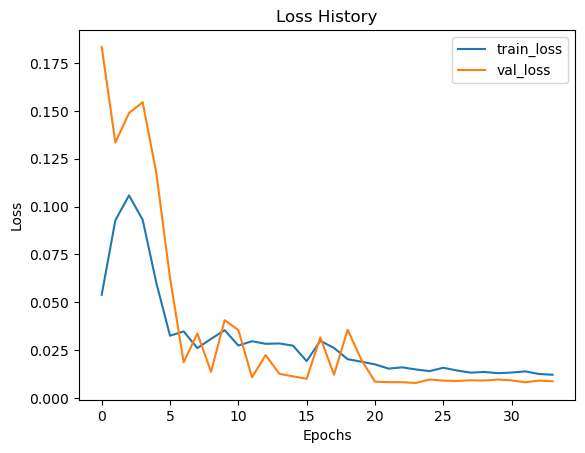

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

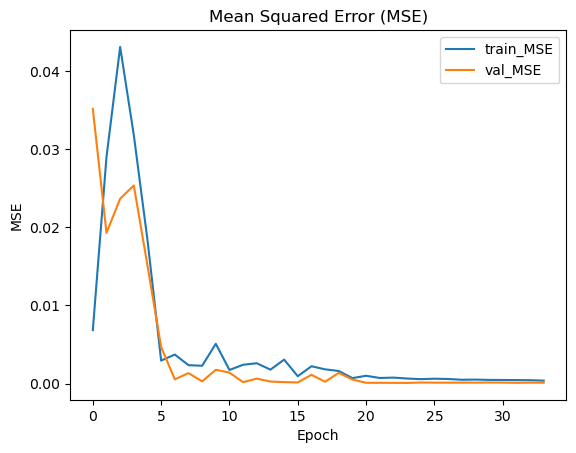

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

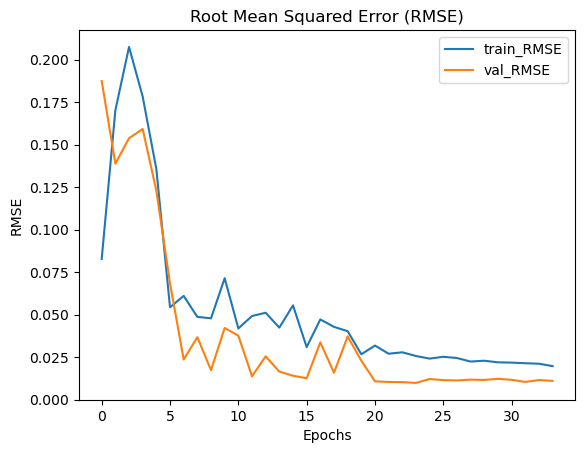

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

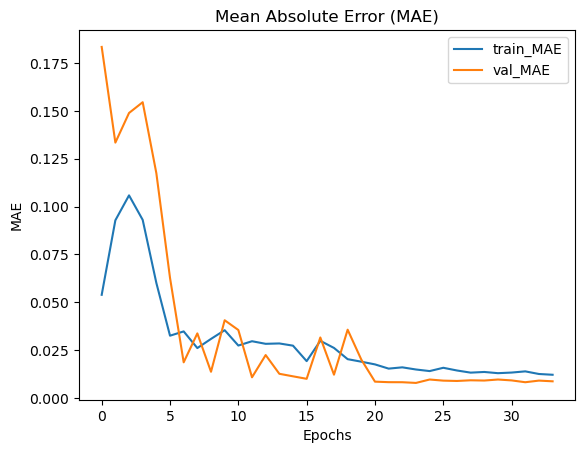

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

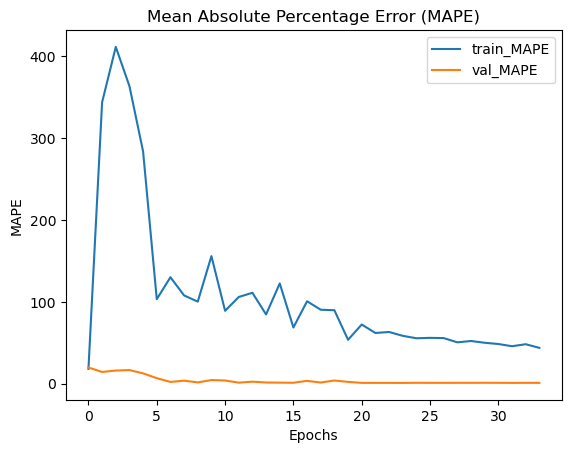

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 20:06:31.696607: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7598, 4, 2)
Labels Shape: (7598, 1, 1)
Prediction Shape: (7598, 1, 10)


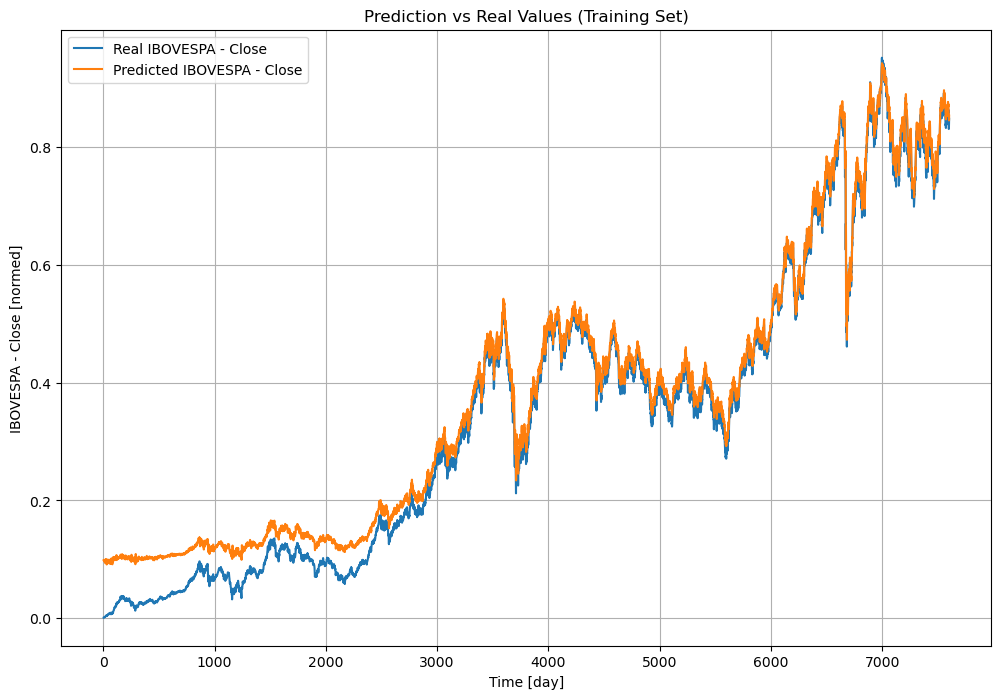

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 2)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


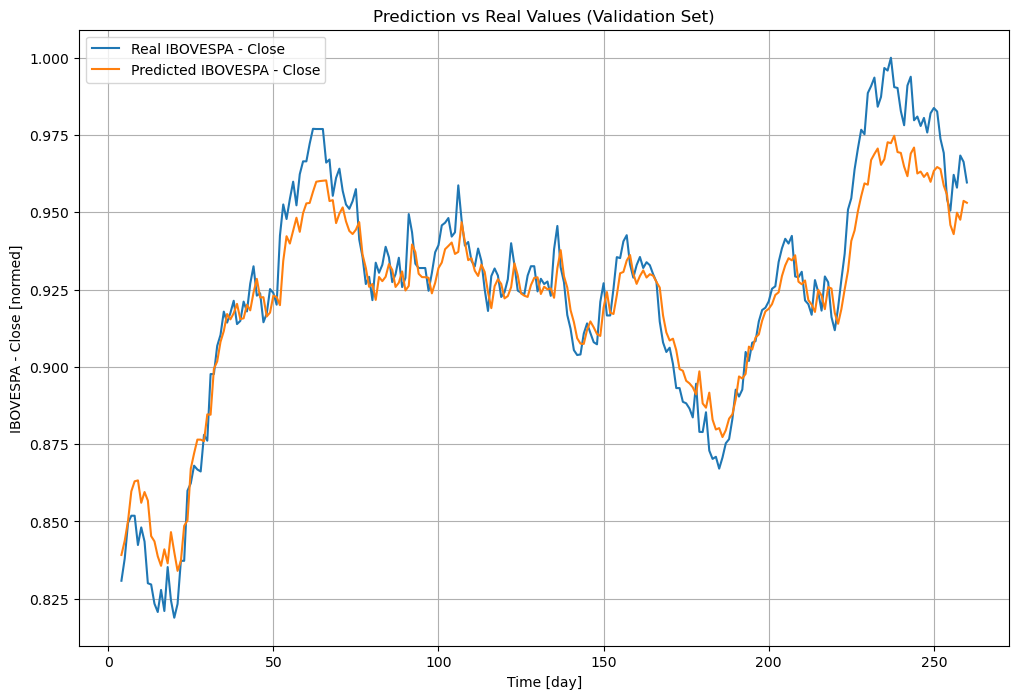

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 2)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


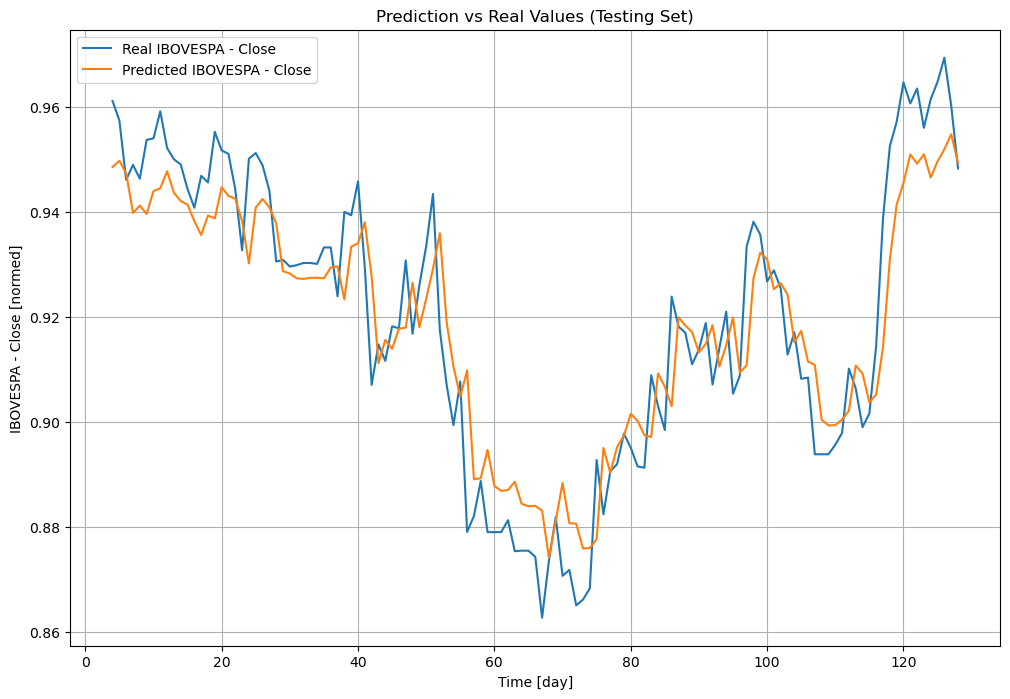

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

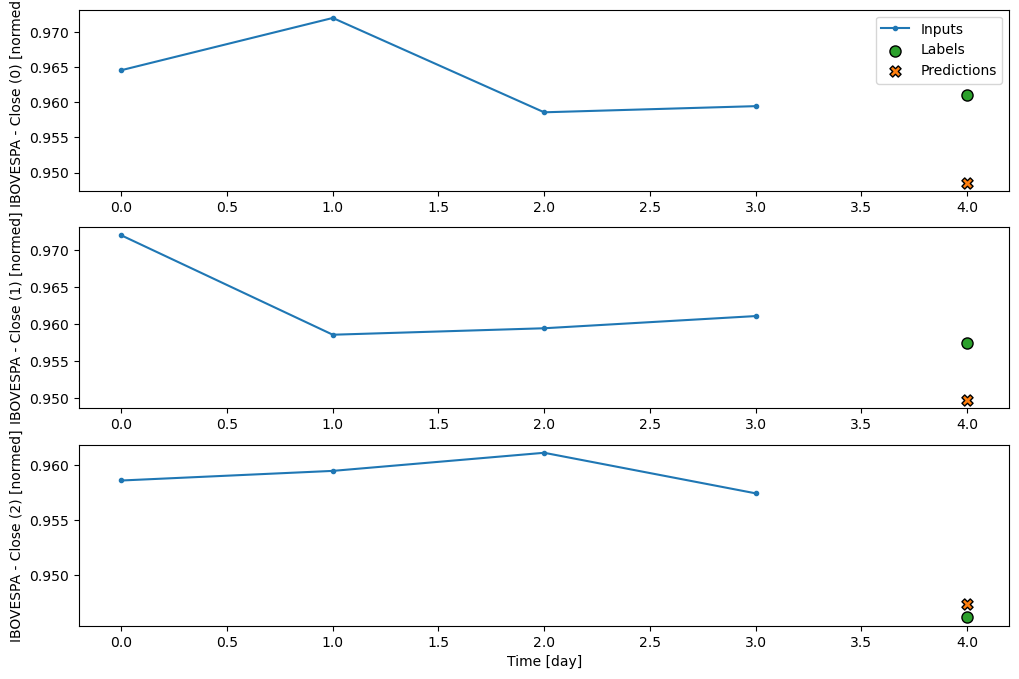

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:8s:914ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step


array([[[0.94855106, 0.94855106, 0.94855106, ..., 0.94855106,
         0.94855106, 0.94855106]],

       [[0.949738  , 0.949738  , 0.949738  , ..., 0.949738  ,
         0.949738  , 0.949738  ]],

       [[0.94732654, 0.94732654, 0.94732654, ..., 0.94732654,
         0.94732654, 0.94732654]],

       ...,

       [[0.9519223 , 0.9519223 , 0.9519223 , ..., 0.9519223 ,
         0.9519223 , 0.9519223 ]],

       [[0.9547938 , 0.9547938 , 0.9547938 , ..., 0.9547938 ,
         0.9547938 , 0.9547938 ]],

       [[0.94936347, 0.94936347, 0.94936347, ..., 0.94936347,
         0.94936347, 0.94936347]]], shape=(125, 1, 10), dtype=float32)

In [53]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')